# IT Expenditure Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('IT Expenditure dataset.xlsx')
df.head(10)

,Date,Business Area,Region,Country,IT Sub Area,IT Area,Cost element name,Cost Element Group,Cost Element Sub Group,Actual,Forecast,Plan
0,Jan,R&D,Europe,United Kingdom,Planning,BU Support,Other Inbound,Shared Services,Inbound Allocations,NaN,NaN,-5805.03
1,Jan,R&D,Europe,United Kingdom,Planning,BU Support,Other Miscellaneous Expense,Other,Other,61.56,NaN,NaN
2,Jan,R&D,Europe,United Kingdom,Planning,BU Support,Other Miscellaneous Expense,Other,Other,NaN,61.56,NaN
3,Jan,R&D,Europe,United Kingdom,Planning,BU Support,Other Miscellaneous Expense,Other,Other,NaN,NaN,270.01
4,Jan,R&D,Europe,United Kingdom,Planning,BU Support,Regular Salaries And Wages,Labor,Internal Labor,NaN,NaN,-10692.07
5,Jan,R&D,Europe,United Kingdom,Planning,BU Support,Travel Expense,Other,Travel,NaN,NaN,-2025.01
6,Jan,Distribution,Europe,United Kingdom,GRC,Governance,Bonuses,Labor,Internal Labor,2693.00,NaN,NaN
7,Jan,Distribution,Europe,United Kingdom,GRC,Governance,Bonuses,Labor,Internal Labor,NaN,2693.00,NaN
8,Jan,Distribution,Europe,United Kingdom,GRC,Governance,Contractors,Labor,External Labor,NaN,NaN,16125.10
9,Jan,Distribution,Europe,United Kingdom,GRC,Governance,Customer Events,Other,Other,73.93,NaN,NaN


In [ ]:
df.tail(10)

,Date,Business Area,Region,Country,IT Sub Area,IT Area,Cost element name,Cost Element Group,Cost Element Sub Group,Actual,Forecast,Plan
81600,Dec,BU,Latin America,Brazil,Emerging,BU Support,Telephone,Other,Telecomm,NaN,11636.3950,NaN
81601,Dec,BU,Latin America,Brazil,Emerging,BU Support,Telephone,Other,Telecomm,NaN,NaN,6753.07
81602,Dec,BU,Latin America,Brazil,Emerging,BU Support,Training Assistance,Other,Training,NaN,-245.9367,NaN
81603,Dec,BU,Latin America,Brazil,Emerging,BU Support,Travel Expense,Other,Travel,NaN,1075.5217,NaN
81604,Dec,BU,Latin America,Brazil,Emerging,BU Support,Vacation,Labor,Internal Labor,NaN,-945.4033,NaN
81605,Dec,BU,Latin America,Brazil,Emerging,BU Support,Vacation Accrual,Labor,Internal Labor,NaN,-760.5000,NaN
81606,Dec,Distribution,Europe,Italy,GRC,Governance,Professional Services,Labor,External Labor,NaN,23943.7900,NaN
81607,Dec,Distribution,Europe,Italy,GRC,Governance,Professional Services,Labor,External Labor,NaN,NaN,23943.79
81608,Dec,Distribution,Europe,Italy,GRC,Governance,Regular Salaries And Wages,Labor,Internal Labor,NaN,62852.4700,NaN
81609,Dec,Distribution,Europe,Italy,GRC,Governance,Regular Salaries And Wages,Labor,Internal Labor,NaN,NaN,62852.47


### Check dtypes

In [ ]:
df.dtypes

,0
Date,object
Business Area,object
Region,object
Country,object
IT Sub Area,object
IT Area,object
Cost element name,object
Cost Element Group,object
Cost Element Sub Group,object
Actual,float64


### Check Missing Values

In [ ]:
df.isnull().sum()

,0
Date,0
Business Area,0
Region,0
Country,0
IT Sub Area,0
IT Area,0
Cost element name,0
Cost Element Group,0
Cost Element Sub Group,0
Actual,58726


### Creating Variance Flag

In [ ]:
def variance_flag(row):
    actual = row['Actual']
    forecast = row['Forecast']
    plan = row['Plan']

    if pd.isna(actual):
        return "Not Yet Incurred"
    elif not pd.isna(actual) and pd.isna(plan):
        return "Unplanned Spend"
    elif not pd.isna(actual) and pd.isna(forecast):
        return "No Forecast"
    else:
        return "Normal Variance"

df["Variance_Flag"] = df.apply(variance_flag, axis=1)
df.head()

,Date,Business Area,Region,Country,IT Sub Area,IT Area,Cost element name,Cost Element Group,Cost Element Sub Group,Actual,Forecast,Plan,Variance_Flag
0,Jan,R&D,Europe,United Kingdom,Planning,BU Support,Other Inbound,Shared Services,Inbound Allocations,NaN,NaN,-5805.03,Not Yet Incurred
1,Jan,R&D,Europe,United Kingdom,Planning,BU Support,Other Miscellaneous Expense,Other,Other,61.56,NaN,NaN,Unplanned Spend
2,Jan,R&D,Europe,United Kingdom,Planning,BU Support,Other Miscellaneous Expense,Other,Other,NaN,61.56,NaN,Not Yet Incurred
3,Jan,R&D,Europe,United Kingdom,Planning,BU Support,Other Miscellaneous Expense,Other,Other,NaN,NaN,270.01,Not Yet Incurred
4,Jan,R&D,Europe,United Kingdom,Planning,BU Support,Regular Salaries And Wages,Labor,Internal Labor,NaN,NaN,-10692.07,Not Yet Incurred


### Convert date into datetime

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%b', errors='coerce')

In [28]:
df.head()

,Date,Business Area,Region,Country,IT Sub Area,IT Area,Cost element name,Cost Element Group,Cost Element Sub Group,Actual,Forecast,Plan
0,1900-01-01,R&D,Europe,United Kingdom,Planning,BU Support,Other Inbound,Shared Services,Inbound Allocations,NaN,NaN,-5805.03
1,1900-01-01,R&D,Europe,United Kingdom,Planning,BU Support,Other Miscellaneous Expense,Other,Other,61.56,NaN,NaN
2,1900-01-01,R&D,Europe,United Kingdom,Planning,BU Support,Other Miscellaneous Expense,Other,Other,NaN,61.56,NaN
3,1900-01-01,R&D,Europe,United Kingdom,Planning,BU Support,Other Miscellaneous Expense,Other,Other,NaN,NaN,270.01
4,1900-01-01,R&D,Europe,United Kingdom,Planning,BU Support,Regular Salaries And Wages,Labor,Internal Labor,NaN,NaN,-10692.07


### Reshape Columns for Variance Analysis

In [32]:
keys = [
    'Date',
    'Business Area',
    'Region',
    'Country',
    'IT Area',
    'IT Sub Area',
    'Cost element name',
    'Cost Element Group',
    'Cost Element Sub Group'
]


df['Actual']   = pd.to_numeric(df['Actual'],   errors='coerce')
df['Forecast'] = pd.to_numeric(df['Forecast'], errors='coerce')
df['Plan']     = pd.to_numeric(df['Plan'],     errors='coerce')

df_grouped = df.groupby(keys).agg(
    Actual=('Actual', 'sum'),
    Forecast=('Forecast', 'sum'),
    Plan=('Plan', 'sum')
).reset_index()


In [34]:
df_grouped.shape
df_grouped


,Date,Business Area,Region,Country,IT Area,IT Sub Area,Cost element name,Cost Element Group,Cost Element Sub Group,Actual,Forecast,Plan
0,1900-01-01,BU,Canada,Canada,BU Support,Distribution,Allowances,Labor,Internal Labor,900.0,900.00,0.00
1,1900-01-01,BU,Canada,Canada,BU Support,Distribution,Computer Rental,Hardware & Software,Hardware,185.4,185.40,342.68
2,1900-01-01,BU,Canada,Canada,BU Support,Distribution,Contractors,Labor,External Labor,0.0,0.00,4814.02
3,1900-01-01,BU,Canada,Canada,BU Support,Distribution,Insurance,Labor,Internal Labor,2027.5,2027.50,956.07
4,1900-01-01,BU,Canada,Canada,BU Support,Distribution,Insurance,Other,Vehicles,0.0,0.00,778.81
...,...,...,...,...,...,...,...,...,...,...,...,...
25329,1900-12-01,Services,USA,USA,Enablement,Six Sigma,Team Performance,Other,Recognition,0.0,75.00,75.00
25330,1900-12-01,Services,USA,USA,Enablement,Six Sigma,Telecom,Other,Telecomm,0.0,450.00,450.00
25331,1900-12-01,Services,USA,USA,Enablement,Six Sigma,Training,Other,Training,0.0,1000.00,1000.00
25332,1900-12-01,Services,USA,USA,Enablement,Six Sigma,Training Allowance,Other,Training,0.0,4258.33,4258.33


### Calculate Variance

In [35]:
# Variance columns
df_grouped['Var_Actual_Plan'] = df_grouped['Actual'] - df_grouped['Plan']
df_grouped['Var_Actual_Forecast'] = df_grouped['Actual'] - df_grouped['Forecast']
df_grouped['Var_Forecast_Plan'] = df_grouped['Forecast'] - df_grouped['Plan']

# Safe variance percentage
import numpy as np
df_grouped['Var_Percent'] = np.where(
    (df_grouped['Plan'].isna()) | (df_grouped['Plan'] == 0),
    np.nan,
    df_grouped['Var_Actual_Plan'] / df_grouped['Plan']
)


In [38]:
df_grouped[['Actual','Forecast','Plan','Var_Actual_Plan','Var_Actual_Forecast','Var_Forecast_Plan','Var_Percent']].head()

,Actual,Forecast,Plan,Var_Actual_Plan,Var_Actual_Forecast,Var_Forecast_Plan,Var_Percent
0,900.0,900.0,0.00,900.00,0.0,900.00,NaN
1,185.4,185.4,342.68,-157.28,0.0,-157.28,-0.458970
2,0.0,0.0,4814.02,-4814.02,0.0,-4814.02,-1.000000
3,2027.5,2027.5,956.07,1071.43,0.0,1071.43,1.120661
4,0.0,0.0,778.81,-778.81,0.0,-778.81,-1.000000


## Variance By Business Area

In [39]:
business_area_summary = df_grouped.groupby('Business Area').agg(
    Total_Actual=('Actual', 'sum'),
    Total_Plan=('Plan', 'sum'),
    Total_Variance=('Var_Actual_Plan', 'sum')
).reset_index()

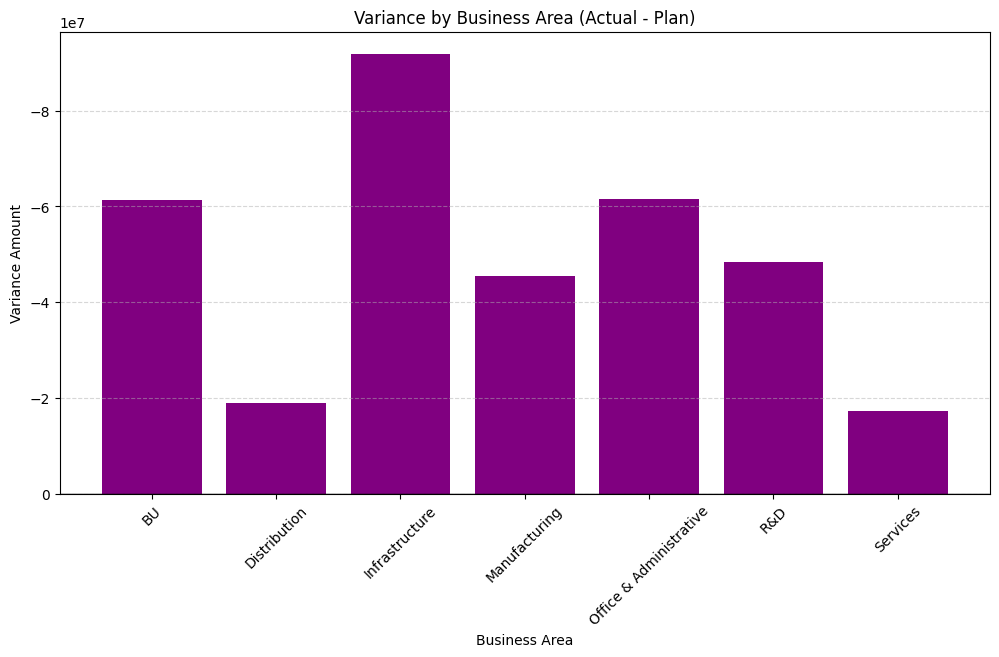

In [47]:
plt.figure(figsize=(12, 6))

plt.bar(business_area_summary['Business Area'],
        business_area_summary['Total_Variance'],
        color='purple')

plt.axhline(0, color='black', linewidth=1)

plt.title("Variance by Business Area (Actual - Plan)")
plt.xlabel("Business Area")
plt.ylabel("Variance Amount")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.gca().invert_yaxis()

plt.show()


## Variance By Country

In [48]:
country_summary = df_grouped.groupby('Country').agg(
    Total_Actual=('Actual', 'sum'),
    Total_Plan=('Plan', 'sum'),
    Total_Variance=('Var_Actual_Plan', 'sum')
).reset_index()

In [50]:
# colored Variance Bars
colors = country_summary['Total_Variance'].apply(
    lambda x: 'red' if x > 0 else 'green'
)

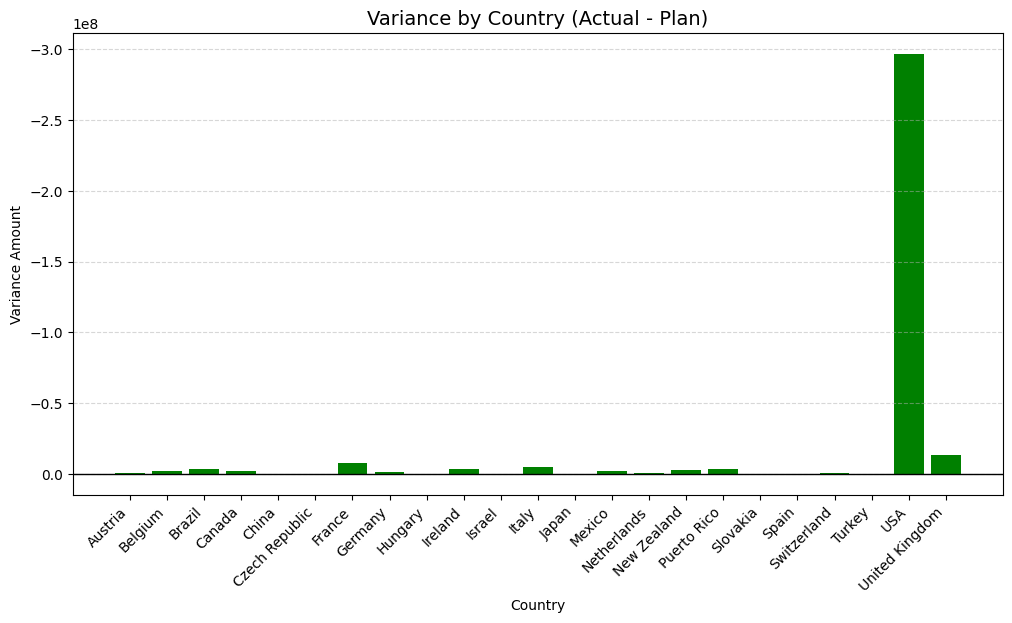

In [52]:
# Plot Variance By Country
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.bar(country_summary['Country'],
        country_summary['Total_Variance'],
        color=colors)

plt.axhline(0, color='black', linewidth=1)

plt.title("Variance by Country (Actual - Plan)", fontsize=14)
plt.xlabel("Country")
plt.ylabel("Variance Amount")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().invert_yaxis()

plt.show()


## Variance By Cost Element Group

In [53]:
cost_group_summary = df_grouped.groupby('Cost Element Group').agg(
    Total_Actual=('Actual', 'sum'),
    Total_Plan=('Plan', 'sum'),
    Total_Variance=('Var_Actual_Plan', 'sum')
).reset_index()

In [54]:
# colored Bars
colors = cost_group_summary['Total_Variance'].apply(
    lambda x: 'red' if x > 0 else 'green'
)

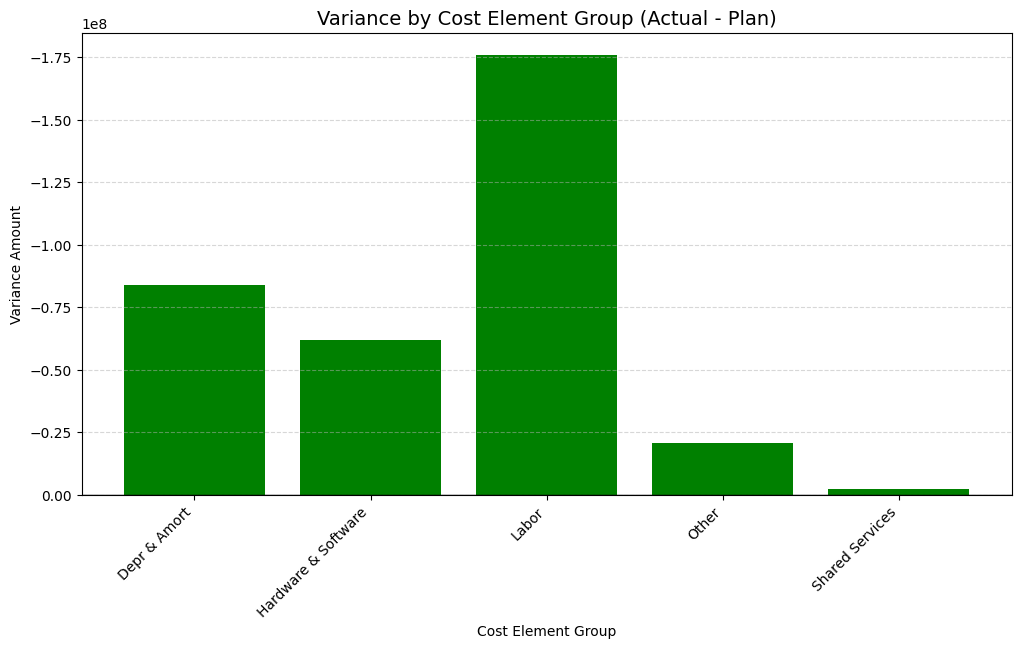

In [55]:
# Plot Variance By Cost Element Group
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.bar(cost_group_summary['Cost Element Group'],
        cost_group_summary['Total_Variance'],
        color=colors)

plt.axhline(0, color='black', linewidth=1)

plt.title("Variance by Cost Element Group (Actual - Plan)", fontsize=14)
plt.xlabel("Cost Element Group")
plt.ylabel("Variance Amount")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().invert_yaxis()

plt.show()

### Variance By IT area

In [64]:
it_area_summary = df_grouped.groupby('IT Area').agg(
    Total_Actual=('Actual', 'sum'),
    Total_Plan=('Plan', 'sum'),
    Total_Variance=('Var_Actual_Plan', 'sum')
).reset_index()

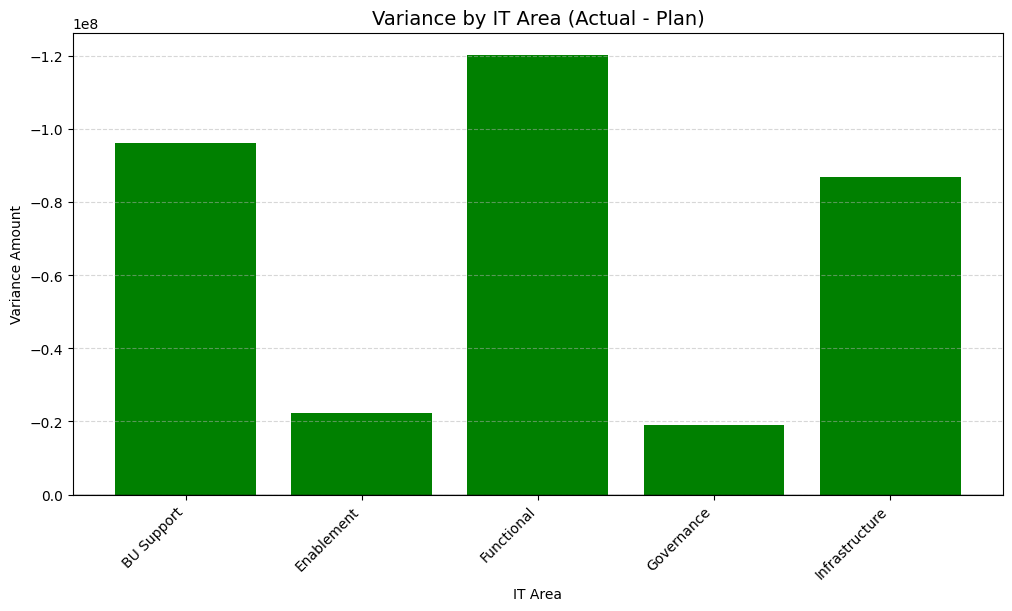

In [65]:
# colors
colors = it_area_summary['Total_Variance'].apply(
    lambda x: 'red' if x > 0 else 'green'
)
#Plot the chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.bar(it_area_summary['IT Area'],
        it_area_summary['Total_Variance'],
        color=colors)

plt.axhline(0, color='black', linewidth=1)

plt.title("Variance by IT Area (Actual - Plan)", fontsize=14)
plt.xlabel("IT Area")
plt.ylabel("Variance Amount")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().invert_yaxis()

plt.show()

### Extract Month name

In [66]:
df_grouped['Month'] = df_grouped['Date'].dt.month_name().str[:3]

In [67]:
#Aggregate by month
monthly_trend = df_grouped.groupby('Month').agg(
    Monthly_Actual=('Actual', 'sum'),
    Monthly_Forecast=('Forecast', 'sum'),
    Monthly_Plan=('Plan', 'sum')
).reset_index()

In [68]:
# Sort Months Correctly
monthly_trend = df_grouped.groupby('Month').agg(
    Monthly_Actual=('Actual', 'sum'),
    Monthly_Forecast=('Forecast', 'sum'),
    Monthly_Plan=('Plan', 'sum')
).reset_index()

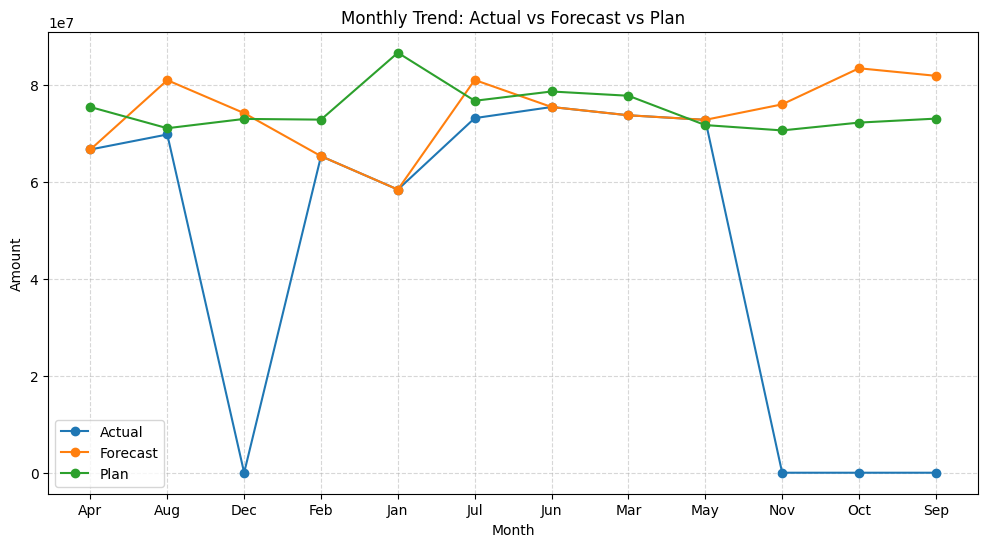

In [69]:
#Plot Monthly Trend
plt.figure(figsize=(12,6))

plt.plot(monthly_trend['Month'], monthly_trend['Monthly_Actual'], label='Actual', marker='o')
plt.plot(monthly_trend['Month'], monthly_trend['Monthly_Forecast'], label='Forecast', marker='o')
plt.plot(monthly_trend['Month'], monthly_trend['Monthly_Plan'], label='Plan', marker='o')

plt.title("Monthly Trend: Actual vs Forecast vs Plan")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.show()

## Calculate Budget Utilization

In [72]:
#compute Actual and Total Plan by Business Area
utilization_by_area = df_grouped.groupby('Business Area').agg(
    Total_Actual=('Actual', 'sum'),
    Total_Plan=('Plan', 'sum')
).reset_index()
utilization_by_area['Utilization_Percent'] = (
    utilization_by_area['Total_Actual'] / utilization_by_area['Total_Plan']
) * 100

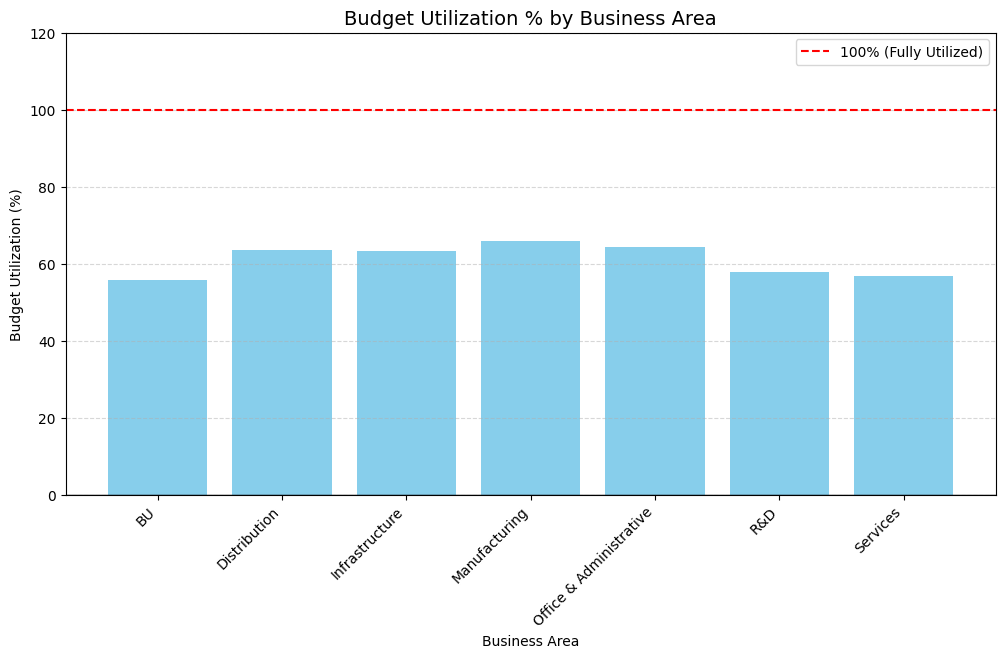

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.bar(utilization_by_area['Business Area'],
        utilization_by_area['Utilization_Percent'],
        color='skyblue')

plt.axhline(100, color='red', linestyle='--', label='100% (Fully Utilized)')
plt.axhline(0, color='black', linewidth=1)

plt.title("Budget Utilization % by Business Area", fontsize=14)
plt.xlabel("Business Area")
plt.ylabel("Budget Utilization (%)")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 120)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()

plt.show()

## Calculating Budget Utilization By Cost Element Group

In [74]:
utilization_by_costgroup = df_grouped.groupby('Cost Element Group').agg(
    Total_Actual=('Actual', 'sum'),
    Total_Plan=('Plan', 'sum')
).reset_index()

utilization_by_costgroup['Utilization_Percent'] = (
    (utilization_by_costgroup['Total_Actual'] / utilization_by_costgroup['Total_Plan']) * 100
)

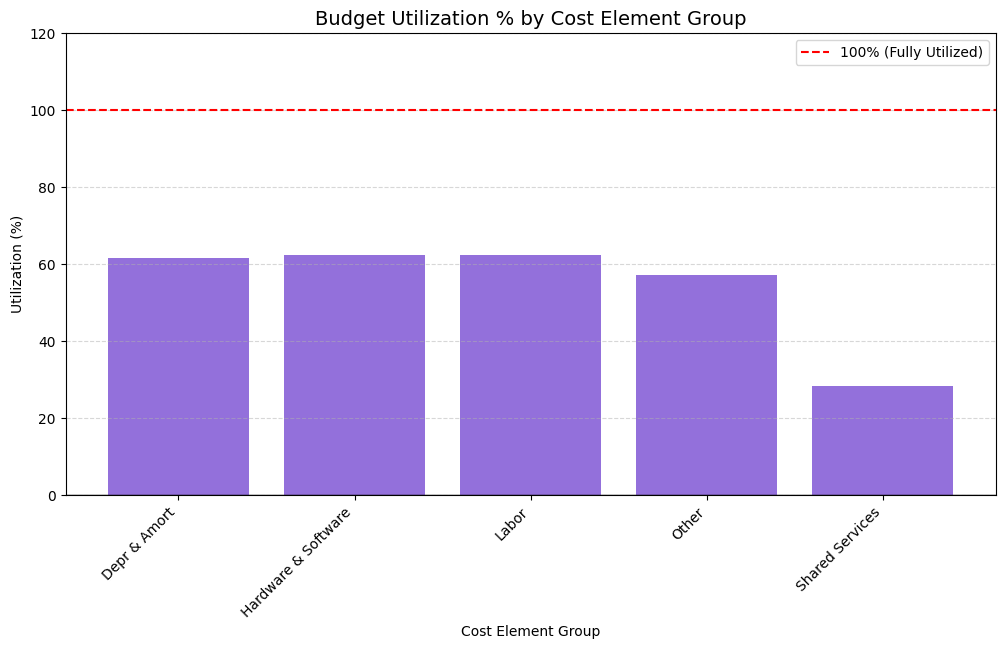

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.bar(utilization_by_costgroup['Cost Element Group'],
        utilization_by_costgroup['Utilization_Percent'],
        color='mediumpurple')

plt.axhline(100, color='red', linestyle='--', label='100% (Fully Utilized)')
plt.axhline(0, color='black', linewidth=1)

plt.title("Budget Utilization % by Cost Element Group", fontsize=14)
plt.xlabel("Cost Element Group")
plt.ylabel("Utilization (%)")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 120)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()

plt.show()

### Budget Utilization by IT area

In [76]:
utilization_by_itarea = df_grouped.groupby('IT Area').agg(
    Total_Actual=('Actual', 'sum'),
    Total_Plan=('Plan', 'sum')
).reset_index()

utilization_by_itarea['Utilization_Percent'] = (
    (utilization_by_itarea['Total_Actual'] / utilization_by_itarea['Total_Plan']) * 100
)

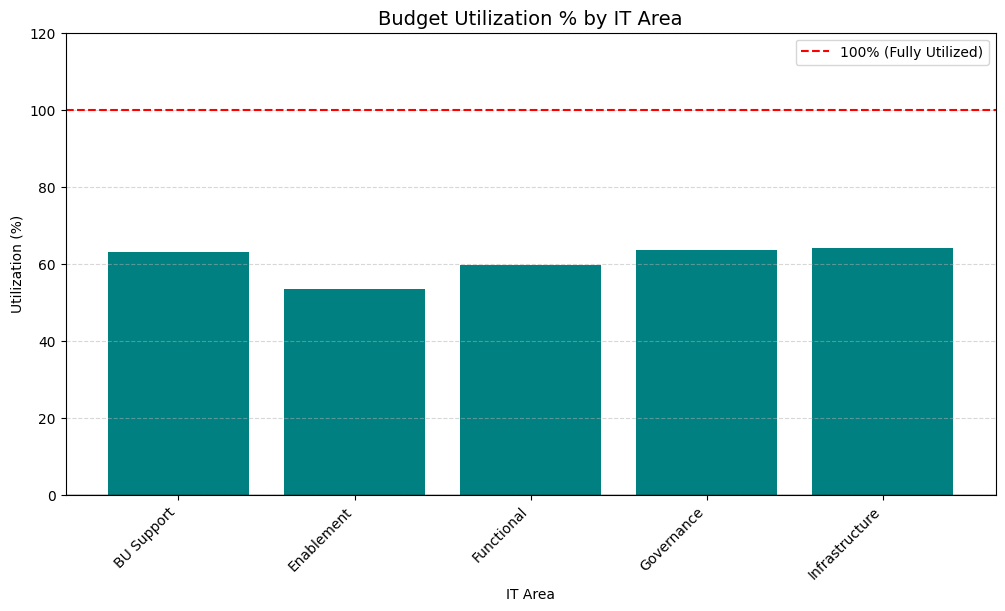

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.bar(utilization_by_itarea['IT Area'],
        utilization_by_itarea['Utilization_Percent'],
        color='teal')

plt.axhline(100, color='red', linestyle='--', label='100% (Fully Utilized)')
plt.axhline(0, color='black', linewidth=1)

plt.title("Budget Utilization % by IT Area", fontsize=14)
plt.xlabel("IT Area")
plt.ylabel("Utilization (%)")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 120)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()

plt.show()

## Budget Utilization by Country

In [78]:
utilization_by_country = df_grouped.groupby('Country').agg(
    Total_Actual=('Actual', 'sum'),
    Total_Plan=('Plan', 'sum')
).reset_index()

utilization_by_country['Utilization_Percent'] = (
    (utilization_by_country['Total_Actual'] / utilization_by_country['Total_Plan']) * 100
)

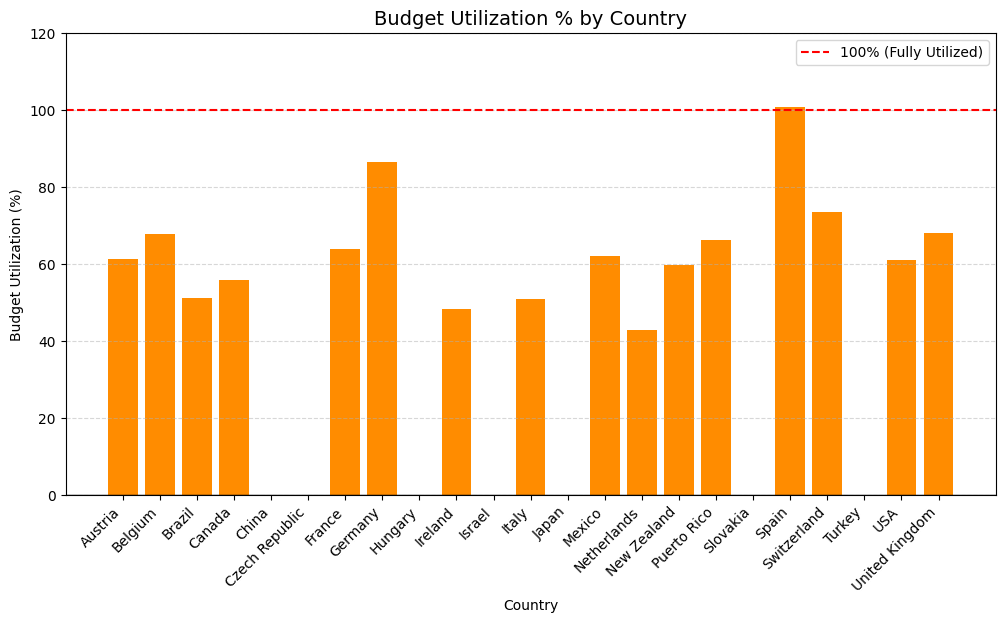

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.bar(utilization_by_country['Country'],
        utilization_by_country['Utilization_Percent'],
        color='darkorange')

plt.axhline(100, color='red', linestyle='--', label='100% (Fully Utilized)')
plt.axhline(0, color='black', linewidth=1)

plt.title("Budget Utilization % by Country", fontsize=14)
plt.xlabel("Country")
plt.ylabel("Budget Utilization (%)")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 120)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()

plt.show()

## Compute Underspend

In [81]:
df_grouped['Underspend'] = df_grouped['Plan'] - df_grouped['Actual']

In [83]:
heatmap_data = df_grouped.pivot_table(
    index='Business Area',
    columns='Cost Element Group',
    values='Underspend',
    aggfunc='sum'
)

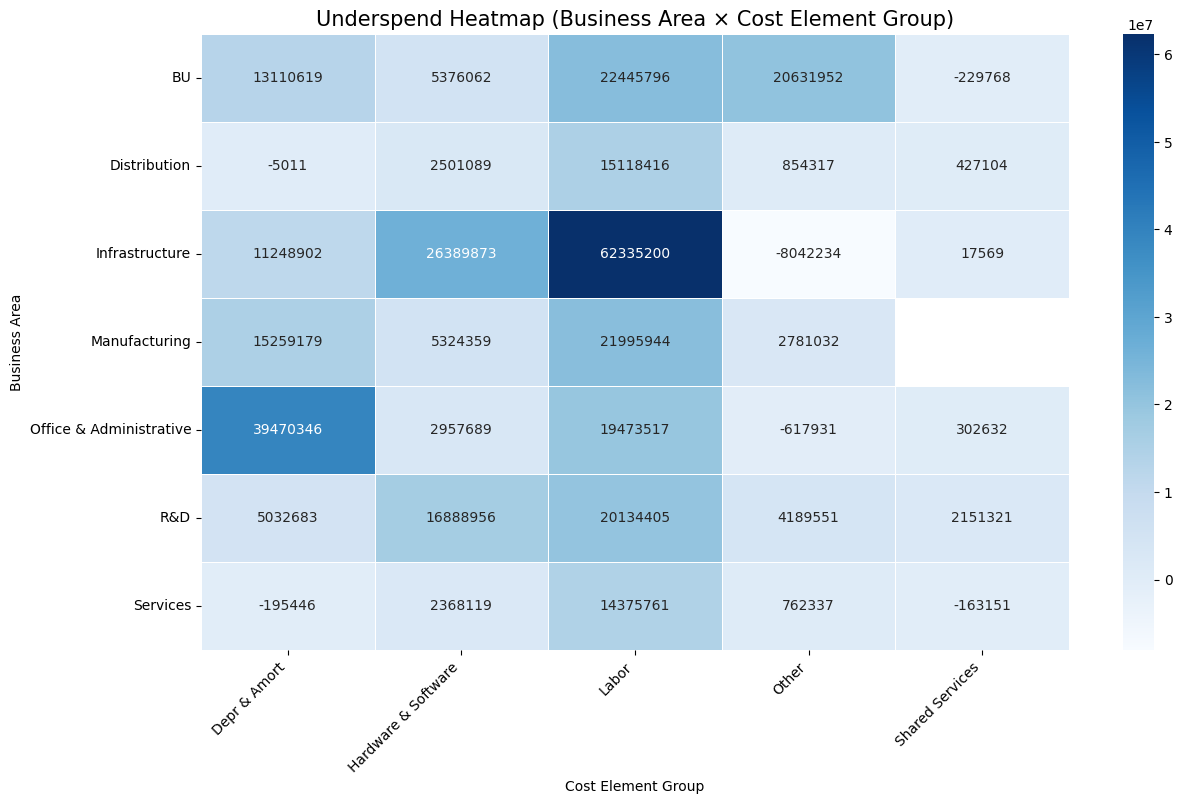

In [85]:
# Plot the Heatmap
plt.figure(figsize=(14, 8))

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0f",
    cmap="Blues",  # red = higher underspend
    linewidths=.5
)

plt.title("Underspend Heatmap (Business Area × Cost Element Group)", fontsize=15)
plt.xlabel("Cost Element Group")
plt.ylabel("Business Area")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

In [86]:
heatmap_data.abs().idxmin().idxmin()

'Depr & Amort'

In [87]:
heatmap_data.min().min()

-8042234.209999999

In [93]:
result = heatmap_data.stack().idxmin()
result
# heatmap_data.at[result]
# heatmap_data.loc[result]

('Infrastructure', 'Other')

## Top 10 Lowest Utilization Areas

In [94]:
df_grouped['Utilization_Percent'] = (
    df_grouped['Actual'] / df_grouped['Plan']
) * 100

In [95]:
df_grouped['Utilization_Percent'] = df_grouped['Utilization_Percent'].replace([np.inf, -np.inf], np.nan)

In [97]:
utilization_detail = df_grouped.groupby(
    ['Business Area', 'Country', 'IT Area']
).agg(
    Total_Actual=('Actual', 'sum'),
    Total_Plan=('Plan', 'sum'),
    Utilization_Percent=('Utilization_Percent', 'mean')
).reset_index()
lowest_10 = utilization_detail.sort_values('Utilization_Percent').head(10)

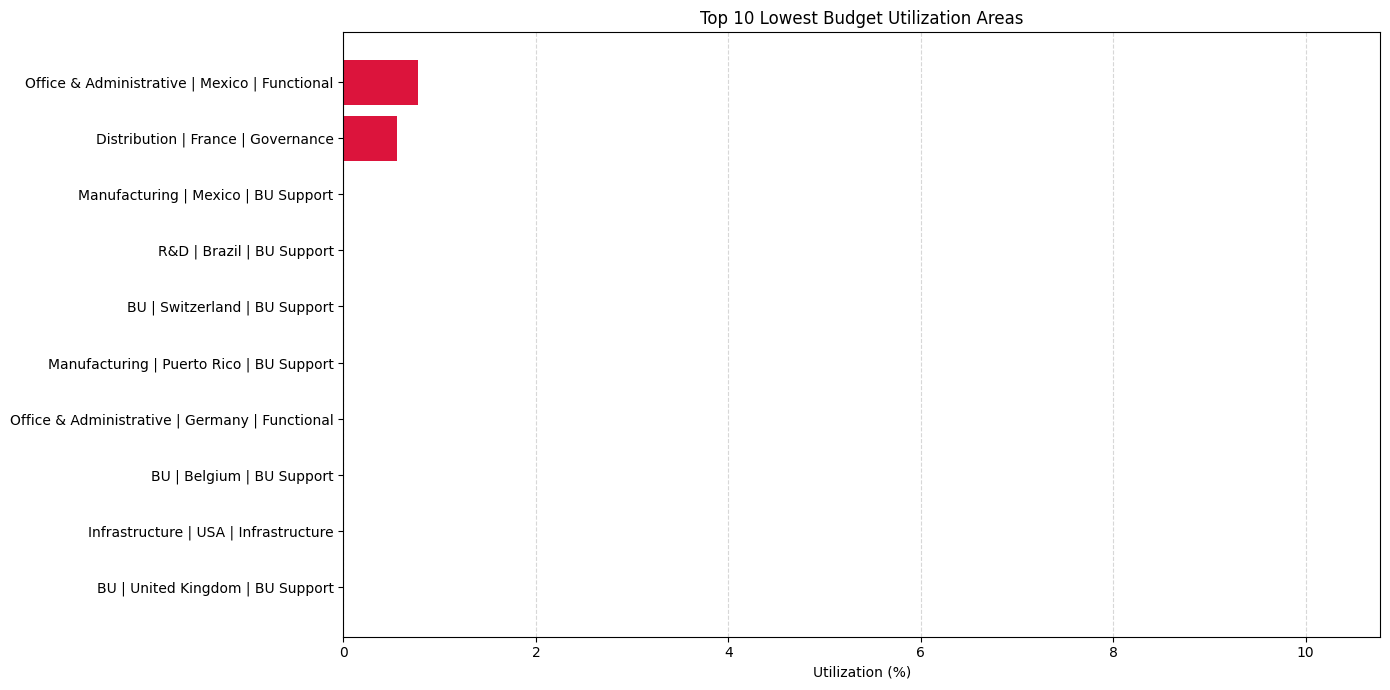

In [98]:
plt.figure(figsize=(14, 7))

plt.barh(
    lowest_10['Business Area'] + " | " + lowest_10['Country'] + " | " + lowest_10['IT Area'],
    lowest_10['Utilization_Percent'],
    color='crimson'
)

plt.xlabel("Utilization (%)")
plt.title("Top 10 Lowest Budget Utilization Areas")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.xlim(0, lowest_10['Utilization_Percent'].max() + 10)
plt.tight_layout()

plt.show()

## Waterfall Plan | Forecast | Actual

In [99]:
total_plan = df_grouped['Plan'].sum()
total_forecast = df_grouped['Forecast'].sum()
total_actual = df_grouped['Actual'].sum()

total_plan, total_forecast, total_actual

(np.float64(900402347.91),
 np.float64(890542400.6343001),
 np.float64(555731161.69))

In [101]:
#preparing data for waterfall chart
data = {
    'Category': ['Plan', 'Forecast Change', 'Actual Change', 'Actual'],
    'Amount': [
        total_plan,
        total_forecast - total_plan,
        total_actual - total_forecast,
        total_actual
    ]
}
import pandas as pd

wf_df = pd.DataFrame(data)

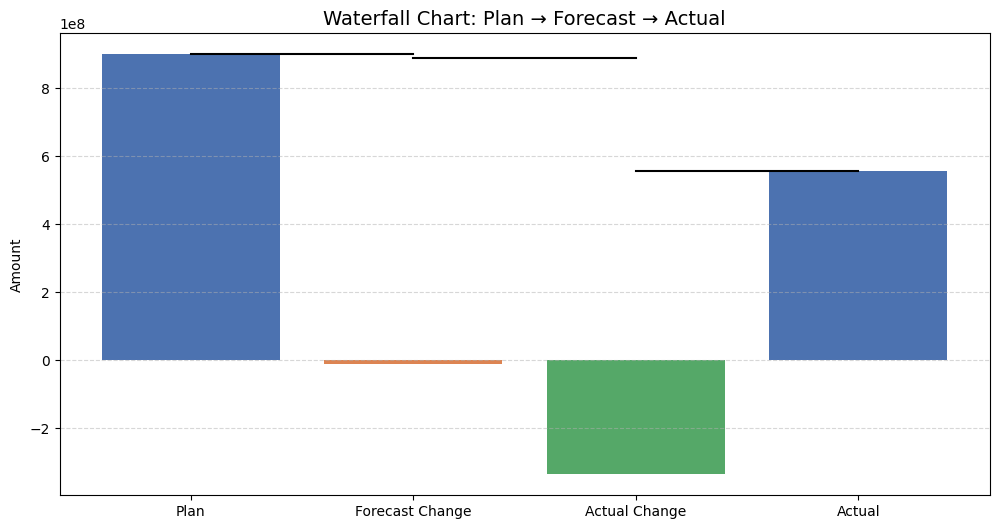

In [102]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

bar_colors = ['#4C72B0', '#DD8452', '#55A868', '#4C72B0']

running_total = np.cumsum(wf_df['Amount'])

# Bars
plt.bar(wf_df['Category'], wf_df['Amount'], color=bar_colors)

# Connector lines
for i in range(1, len(wf_df)):
    plt.plot([i-1, i], [running_total[i-1], running_total[i-1]], color='black')

plt.title("Waterfall Chart: Plan → Forecast → Actual", fontsize=14)
plt.ylabel("Amount")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

## Actual–Forecast–Plan Overspend & Underspend Analysis

In [56]:
import numpy as np

df_grouped['Spending_Status'] = np.where(
    (df_grouped['Plan'] == 0) & (df_grouped['Actual'] > 0),
    "Unplanned Overspend",

    np.where(df_grouped['Actual'] > df_grouped['Plan'],
             "Overspend vs Plan",

    np.where(df_grouped['Actual'] > df_grouped['Forecast'],
             "Overspend vs Forecast",

    "Underspend")))

In [57]:
df_grouped['Spending_Status'].value_counts()

,count
Spending_Status,
Underspend,14657
Unplanned Overspend,6765
Overspend vs Plan,2921
Overspend vs Forecast,991


In [58]:
# Preview the classifications
df_grouped[['Actual','Forecast','Plan','Spending_Status']].head(20)

,Actual,Forecast,Plan,Spending_Status
0,900.00,900.00,0.00,Unplanned Overspend
1,185.40,185.40,342.68,Underspend
2,0.00,0.00,4814.02,Underspend
3,2027.50,2027.50,956.07,Overspend vs Plan
4,0.00,0.00,778.81,Underspend
5,0.00,0.00,389.41,Underspend
6,0.00,0.00,467.29,Underspend
7,0.00,0.00,38.94,Underspend
8,0.00,0.00,777.21,Underspend
9,2073.74,2073.74,1325.23,Overspend vs Plan


In [59]:
# Filtering Overspending Rows
overspend_plan = df_grouped[df_grouped['Spending_Status'] == "Overspend vs Plan"]
overspend_plan.head()

,Date,Business Area,Region,Country,IT Area,IT Sub Area,Cost element name,Cost Element Group,Cost Element Sub Group,Actual,Forecast,Plan,Var_Actual_Plan,Var_Actual_Forecast,Var_Forecast_Plan,Var_Percent,Spending_Status
3,1900-01-01,BU,Canada,Canada,BU Support,Distribution,Insurance,Labor,Internal Labor,2027.50,2027.50,956.07,1071.43,0.0,1071.43,1.120661,Overspend vs Plan
9,1900-01-01,BU,Canada,Canada,BU Support,Distribution,Payroll Taxes - Salaries,Labor,Internal Labor,2073.74,2073.74,1325.23,748.51,0.0,748.51,0.564815,Overspend vs Plan
10,1900-01-01,BU,Canada,Canada,BU Support,Distribution,Regular Salaries And Wages,Labor,Internal Labor,26936.08,26936.08,17383.18,9552.90,0.0,9552.90,0.549548,Overspend vs Plan
12,1900-01-01,BU,Canada,Canada,BU Support,Distribution,Savings Plan,Labor,Internal Labor,543.94,543.94,521.50,22.44,0.0,22.44,0.043030,Overspend vs Plan
23,1900-01-01,BU,Canada,Canada,Functional,R1,Non product,Hardware & Software,Hardware Maintenance,189888.12,189888.12,19107.48,170780.64,0.0,170780.64,8.937894,Overspend vs Plan


In [60]:
# Overspend vs Forecast
overspend_forecast = df_grouped[df_grouped['Spending_Status'] == "Overspend vs Forecast"]
overspend_forecast.head()

,Date,Business Area,Region,Country,IT Area,IT Sub Area,Cost element name,Cost Element Group,Cost Element Sub Group,Actual,Forecast,Plan,Var_Actual_Plan,Var_Actual_Forecast,Var_Forecast_Plan,Var_Percent,Spending_Status
13768,1900-07-01,BU,Europe,Austria,Functional,R1,Other Miscellaneous Expense,Other,Other,0.00,-10693.2325,0.00,0.00,10693.2325,-10693.2325,NaN,Overspend vs Forecast
13818,1900-07-01,BU,Europe,Belgium,Functional,R1,Other Miscellaneous Expense,Other,Other,0.00,-16466.1724,0.00,0.00,16466.1724,-16466.1724,NaN,Overspend vs Forecast
13910,1900-07-01,BU,Europe,Germany,Functional,R3,Regular Salaries And Wages,Labor,Internal Labor,18565.69,-3911.1614,21426.32,-2860.63,22476.8514,-25337.4814,-0.13351,Overspend vs Forecast
13977,1900-07-01,BU,Europe,Switzerland,BU Support,Distribution,Other Miscellaneous Expense,Other,Other,0.00,-8137.7350,0.00,0.00,8137.7350,-8137.7350,NaN,Overspend vs Forecast
13983,1900-07-01,BU,Europe,Switzerland,BU Support,Emerging,Recurring,Other,Other,0.00,-15086.3286,0.00,0.00,15086.3286,-15086.3286,NaN,Overspend vs Forecast


In [61]:
# Unplanned Overspend
unplanned = df_grouped[df_grouped['Spending_Status'] == "Unplanned Overspend"]
unplanned.head()


,Date,Business Area,Region,Country,IT Area,IT Sub Area,Cost element name,Cost Element Group,Cost Element Sub Group,Actual,Forecast,Plan,Var_Actual_Plan,Var_Actual_Forecast,Var_Forecast_Plan,Var_Percent,Spending_Status
0,1900-01-01,BU,Canada,Canada,BU Support,Distribution,Allowances,Labor,Internal Labor,900.00,900.00,0.0,900.00,0.0,900.00,NaN,Unplanned Overspend
11,1900-01-01,BU,Canada,Canada,BU Support,Distribution,Retirement Plan Match,Labor,Internal Labor,352.20,352.20,0.0,352.20,0.0,352.20,NaN,Unplanned Overspend
14,1900-01-01,BU,Canada,Canada,BU Support,Distribution,Telephone,Other,Telecomm,300.27,300.27,0.0,300.27,0.0,300.27,NaN,Unplanned Overspend
20,1900-01-01,BU,Canada,Canada,Functional,R1,M&E-Nondeductible,Other,Travel,350.96,350.96,0.0,350.96,0.0,350.96,NaN,Unplanned Overspend
22,1900-01-01,BU,Canada,Canada,Functional,R1,Messenger Services,Other,Other,17.22,17.22,0.0,17.22,0.0,17.22,NaN,Unplanned Overspend


In [62]:
summary = df_grouped['Spending_Status'].value_counts()
summary

,count
Spending_Status,
Underspend,14657
Unplanned Overspend,6765
Overspend vs Plan,2921
Overspend vs Forecast,991


In [63]:
df_grouped[(df_grouped['Actual'] > df_grouped['Plan']) |
           (df_grouped['Actual'] > df_grouped['Forecast']) |
           ((df_grouped['Plan'] == 0) & (df_grouped['Actual'] > 0))]

,Date,Business Area,Region,Country,IT Area,IT Sub Area,Cost element name,Cost Element Group,Cost Element Sub Group,Actual,Forecast,Plan,Var_Actual_Plan,Var_Actual_Forecast,Var_Forecast_Plan,Var_Percent,Spending_Status
0,1900-01-01,BU,Canada,Canada,BU Support,Distribution,Allowances,Labor,Internal Labor,900.00,900.000,0.00,900.00,0.000,900.000,NaN,Unplanned Overspend
3,1900-01-01,BU,Canada,Canada,BU Support,Distribution,Insurance,Labor,Internal Labor,2027.50,2027.500,956.07,1071.43,0.000,1071.430,1.120661,Overspend vs Plan
9,1900-01-01,BU,Canada,Canada,BU Support,Distribution,Payroll Taxes - Salaries,Labor,Internal Labor,2073.74,2073.740,1325.23,748.51,0.000,748.510,0.564815,Overspend vs Plan
10,1900-01-01,BU,Canada,Canada,BU Support,Distribution,Regular Salaries And Wages,Labor,Internal Labor,26936.08,26936.080,17383.18,9552.90,0.000,9552.900,0.549548,Overspend vs Plan
11,1900-01-01,BU,Canada,Canada,BU Support,Distribution,Retirement Plan Match,Labor,Internal Labor,352.20,352.200,0.00,352.20,0.000,352.200,NaN,Unplanned Overspend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25153,1900-12-01,R&D,Europe,United Kingdom,BU Support,Planning,Regular Salaries And Wages,Labor,Internal Labor,0.00,15198.030,-15711.15,15711.15,-15198.030,30909.180,-1.000000,Overspend vs Plan
25158,1900-12-01,R&D,Europe,United Kingdom,BU Support,Planning,Travel Expense,Other,Travel,0.00,799.200,-1215.00,1215.00,-799.200,2014.200,-1.000000,Overspend vs Plan
25178,1900-12-01,R&D,Latin America,Brazil,BU Support,Planning,Fixed Assets,Depr & Amort,Depreciation,0.00,-9.720,0.00,0.00,9.720,-9.720,NaN,Overspend vs Forecast
25180,1900-12-01,R&D,Latin America,Brazil,BU Support,Planning,Telecom Services,Other,Telecomm,0.00,-60.395,0.00,0.00,60.395,-60.395,NaN,Overspend vs Forecast
